In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("C:\\Datasets\\fortune500.xlsx")
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29500 entries, 0 to 29499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   29500 non-null  int64  
 1   Rank                   29500 non-null  int64  
 2   Company                29500 non-null  object 
 3   Revenue (in millions)  29500 non-null  float64
 4   Profit (in millions)   29500 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe(include="all")

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
count,29500.000000,29500.000000,29500,29500.000000,29500
unique,NaN,NaN,2588,NaN,8618
top,NaN,NaN,CBS,NaN,N.A.
freq,NaN,NaN,61,NaN,369
mean,1983.728814,284.397966,NaN,5237.162102,NaN
std,16.616417,191.401503,NaN,14335.344473,NaN
min,1955.000000,1.000000,NaN,49.700000,NaN
25%,1969.000000,135.000000,NaN,443.275000,NaN
50%,1984.000000,269.000000,NaN,1498.050000,NaN
75%,1999.000000,403.000000,NaN,4607.825000,NaN


In [5]:
df["Profit (in millions)"] = pd.to_numeric(df["Profit (in millions)"],errors="coerce")

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Year                       0
Rank                       0
Company                    0
Revenue (in millions)      0
Profit (in millions)     369
dtype: int64

In [8]:
mean = df["Profit (in millions)"].mean()
df["Profit (in millions)"]=df["Profit (in millions)"].fillna(mean)

In [10]:
df.columns = ['Year', 'Rank', 'Company', 'Revenue',
       'Profit']

In [11]:
Company_year_profit_revenue = df.groupby("Year")[["Profit","Revenue"]].mean()
Company_year_profit_revenue

,Profit,Revenue
Year,,
1955,19.666397,273.5660
1956,23.464199,322.7970
1957,24.609499,348.6130
1958,24.883499,376.6244
1959,20.731099,353.6618
1960,24.493900,394.7912
1961,24.291999,409.4474
1962,24.277799,418.3886
1963,26.965000,458.1642


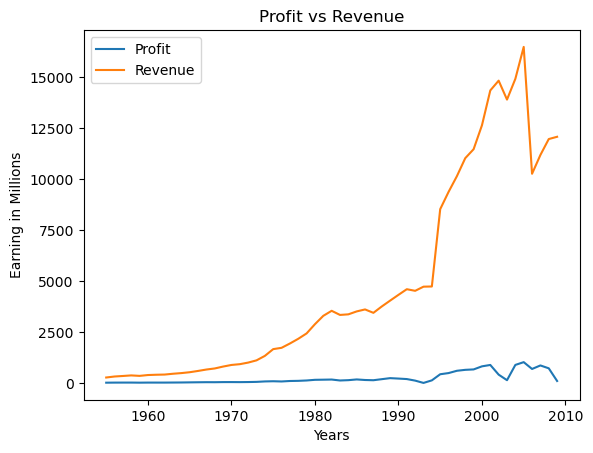

In [12]:
plt.plot(Company_year_profit_revenue)
plt.xlabel("Years")
plt.ylabel("Earning in Millions")
plt.title("Profit vs Revenue")
plt.legend(["Profit","Revenue"])

### Exploring Company data For More Info

In [14]:
company_groupby = df.groupby("Company")

In [19]:
company_info = pd.DataFrame()

In [25]:
company_info["Open_Years"] = company_groupby["Year"].max() - company_groupby["Year"].min() + 1
company_info["Total_Revenue"] = company_groupby["Revenue"].sum()
company_info["Total_Profit"] = company_groupby["Profit"].sum()

In [29]:
company_info.head()

,Open_Years,Total_Revenue,Total_Profit
Company,,,
3Com,8,20348.3,1521.0
3M,55,452853.7,52088.4
A-T-O,4,1302.7,29.5
A. Schulman,22,8312.6,278.3
A.G. Edwards,3,8488.7,756.2


In [32]:
company_info.isnull().sum()

Open_Years       0
Total_Revenue    0
Total_Profit     0
dtype: int64

In [34]:
company_info.shape

(2588, 3)

In [36]:
# Average Profit and Revenue per Year
company_info["Average_Revenue"] = company_info["Total_Revenue"]/company_info["Open_Years"]
company_info["Average_Profit"] = company_info["Total_Profit"]/company_info["Open_Years"]

In [38]:
company_info = company_info.reset_index()
company_info.head()

,Company,Open_Years,Total_Revenue,Total_Profit,Average_Revenue,Average_Profit
0,3Com,8,20348.3,1521.0,2543.537500,190.125000
1,3M,55,452853.7,52088.4,8233.703636,947.061818
2,A-T-O,4,1302.7,29.5,325.675000,7.375000
3,A. Schulman,22,8312.6,278.3,377.845455,12.650000
4,A.G. Edwards,3,8488.7,756.2,2829.566667,252.066667


In [40]:
company_info.describe()

,Open_Years,Total_Revenue,Total_Profit,Average_Revenue,Average_Profit
count,2588.000000,2.588000e+03,2588.000000,2588.000000,2588.000000
mean,12.721406,5.969717e+04,2977.924290,4334.873434,162.781808
std,14.438975,2.197362e+05,14426.948466,9984.770812,1658.028101
min,1.000000,4.970000e+01,-93089.000000,21.290909,-56121.900000
25%,3.000000,3.132650e+03,35.775000,554.587500,6.420625
50%,6.000000,1.025345e+04,317.700000,1956.565000,46.651538
75%,16.000000,3.556043e+04,1494.700000,4137.850000,202.250000
max,55.000000,5.152460e+06,403684.100000,224413.560000,18464.000000


In [42]:
Top_old_Company = pd.DataFrame(company_info[["Company","Open_Years"]].sort_values(by="Open_Years",ascending=False).head(50))
Top_old_Company

,Company,Open_Years
758,Dow Chemical,55
1533,McGraw-Hill,55
713,Del Monte Foods,55
1672,Navistar International,55
2286,Textron,55
227,Ashland,55
2303,Timken,55
210,Archer Daniels Midland,55
1626,NCR,55
1611,Motorola,55


In [49]:
Top_old_Company = company_info.iloc[Top_old_Company.index,:]
Top_old_Company

,Company,Open_Years,Total_Revenue,Total_Profit,Average_Revenue,Average_Profit
758,Dow Chemical,55,741074.6,44225.900000,13474.083636,804.107273
1533,McGraw-Hill,55,100350.8,10560.100000,1824.560000,192.001818
713,Del Monte Foods,55,34349.5,848.900000,624.536364,15.434545
1672,Navistar International,55,246429.4,219.100000,4480.534545,3.983636
2286,Textron,55,285179.3,11551.700000,5185.078182,210.030909
227,Ashland,55,296944.6,8304.200000,5398.992727,150.985455
2303,Timken,55,60690.9,2313.600000,1103.470909,42.065455
210,Archer Daniels Midland,55,495147.4,16040.900000,9002.680000,291.652727
1626,NCR,55,154066.4,7387.100000,2801.207273,134.310909
1611,Motorola,55,601793.3,12953.200000,10941.696364,235.512727


In [52]:
Top_new_Company = pd.DataFrame(company_info[["Company","Open_Years"]].sort_values(by="Open_Years",ascending=True).head(50))
Top_new_Company

,Company,Open_Years
1420,Lion Oil,1
646,Core-Mark International,1
1084,HSN,1
1686,New York Community Bancorp,1
2383,Unified Grocers,1
1272,J.P. Industries,1
655,Country Ins. & Financial Services,1
656,Country Insurance & Fin. Svcs.,1
1276,JDS Uniphase,1
263,BATUS,1


In [54]:
Top_new_Company = company_info.iloc[Top_new_Company.index,:]
Top_new_Company.head()

,Company,Open_Years,Total_Revenue,Total_Profit,Average_Revenue,Average_Profit
1420,Lion Oil,1,98.6,11.1,98.6,11.1
646,Core-Mark International,1,3425.0,17.5,3425.0,17.5
1084,HSN,1,2823.6,-2390.9,2823.6,-2390.9
1686,New York Community Bancorp,1,1677.8,279.1,1677.8,279.1
2383,Unified Grocers,1,4104.8,17.4,4104.8,17.4


## Company data Using Graph

C:\Users\rawat\AppData\Local\Temp\ipykernel_23068\2373558327.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(Top_old_Company["Company"], rotation=90)


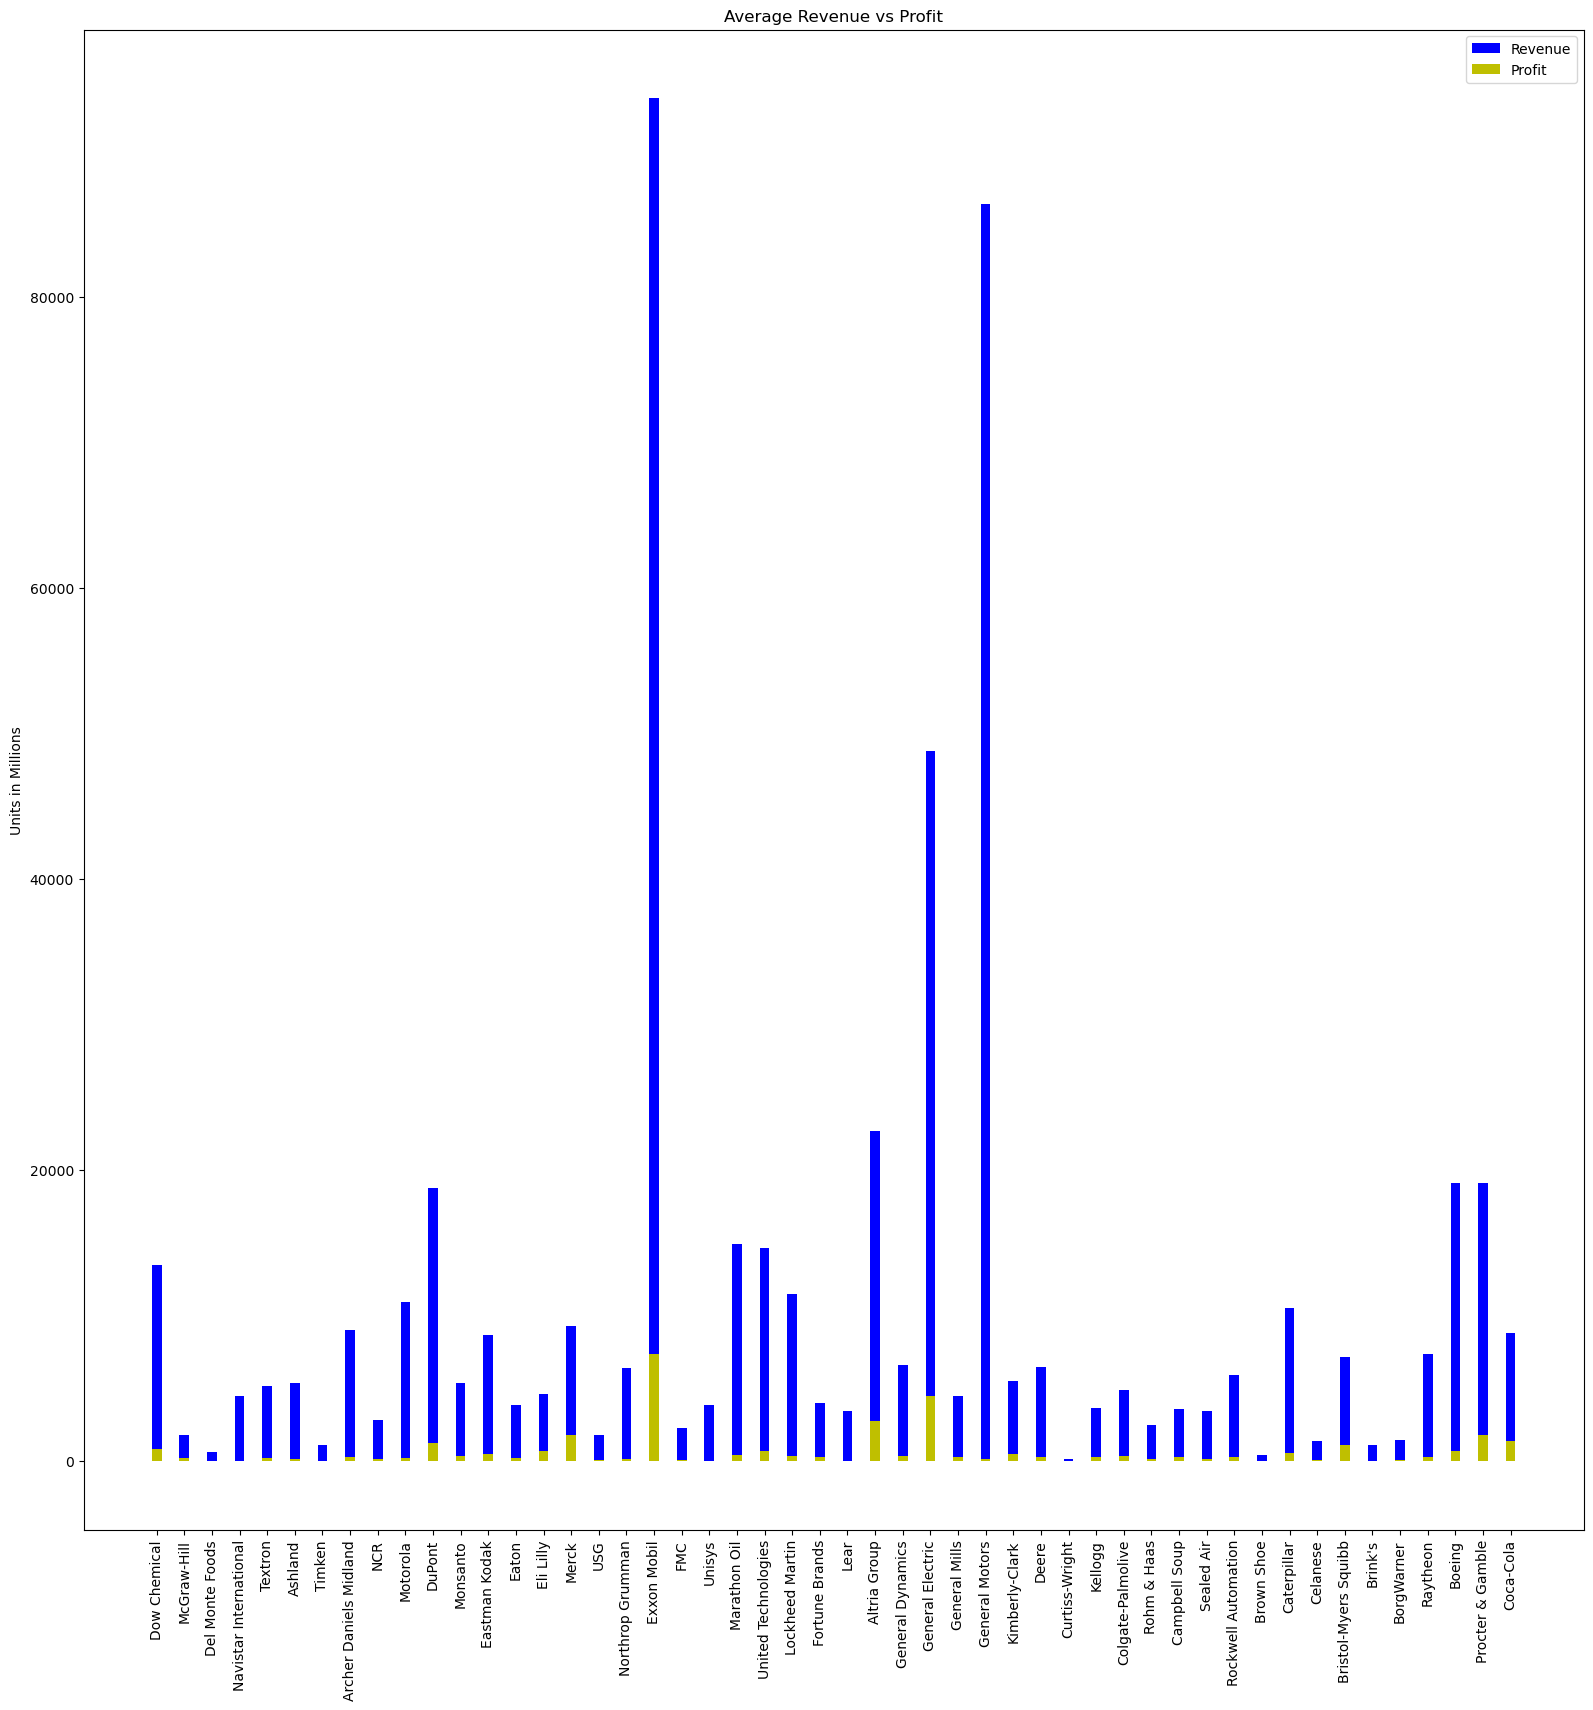

In [57]:
fig=plt.figure(figsize=(15,15))

axes=fig.add_axes([0,0,1,1])   

axes.set_title('Average Revenue vs Profit')
axes.set_ylabel('Units in Millions')

axes.bar(Top_old_Company["Company"],Top_old_Company["Average_Revenue"],width=0.35,color='b')
axes.bar(Top_old_Company["Company"],Top_old_Company["Average_Profit"],width=0.35,color='y')

axes.legend(labels=['Revenue','Profit'])
axes.set_xticklabels(Top_old_Company["Company"], rotation=90)
plt.show()

In [58]:
## Old and Rich Company
Top_old_Company[Top_old_Company["Average_Revenue"]>20000]

,Company,Open_Years,Total_Revenue,Total_Profit,Average_Revenue,Average_Profit
858,Exxon Mobil,55,5152459.6,403684.1,93681.083636,7339.710909
102,Altria Group,55,1245929.3,150823.8,22653.260000,2742.250909
985,General Electric,55,2685105.6,248127.3,48820.101818,4511.405455
992,General Motors,55,4750335.8,7300.1,86369.741818,132.729091


In [59]:
Top_new_Company = Top_new_Company[Top_new_Company["Company"]!="JDS Uniphase"]

C:\Users\rawat\AppData\Local\Temp\ipykernel_23068\3447165133.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(Top_new_Company["Company"], rotation=90)


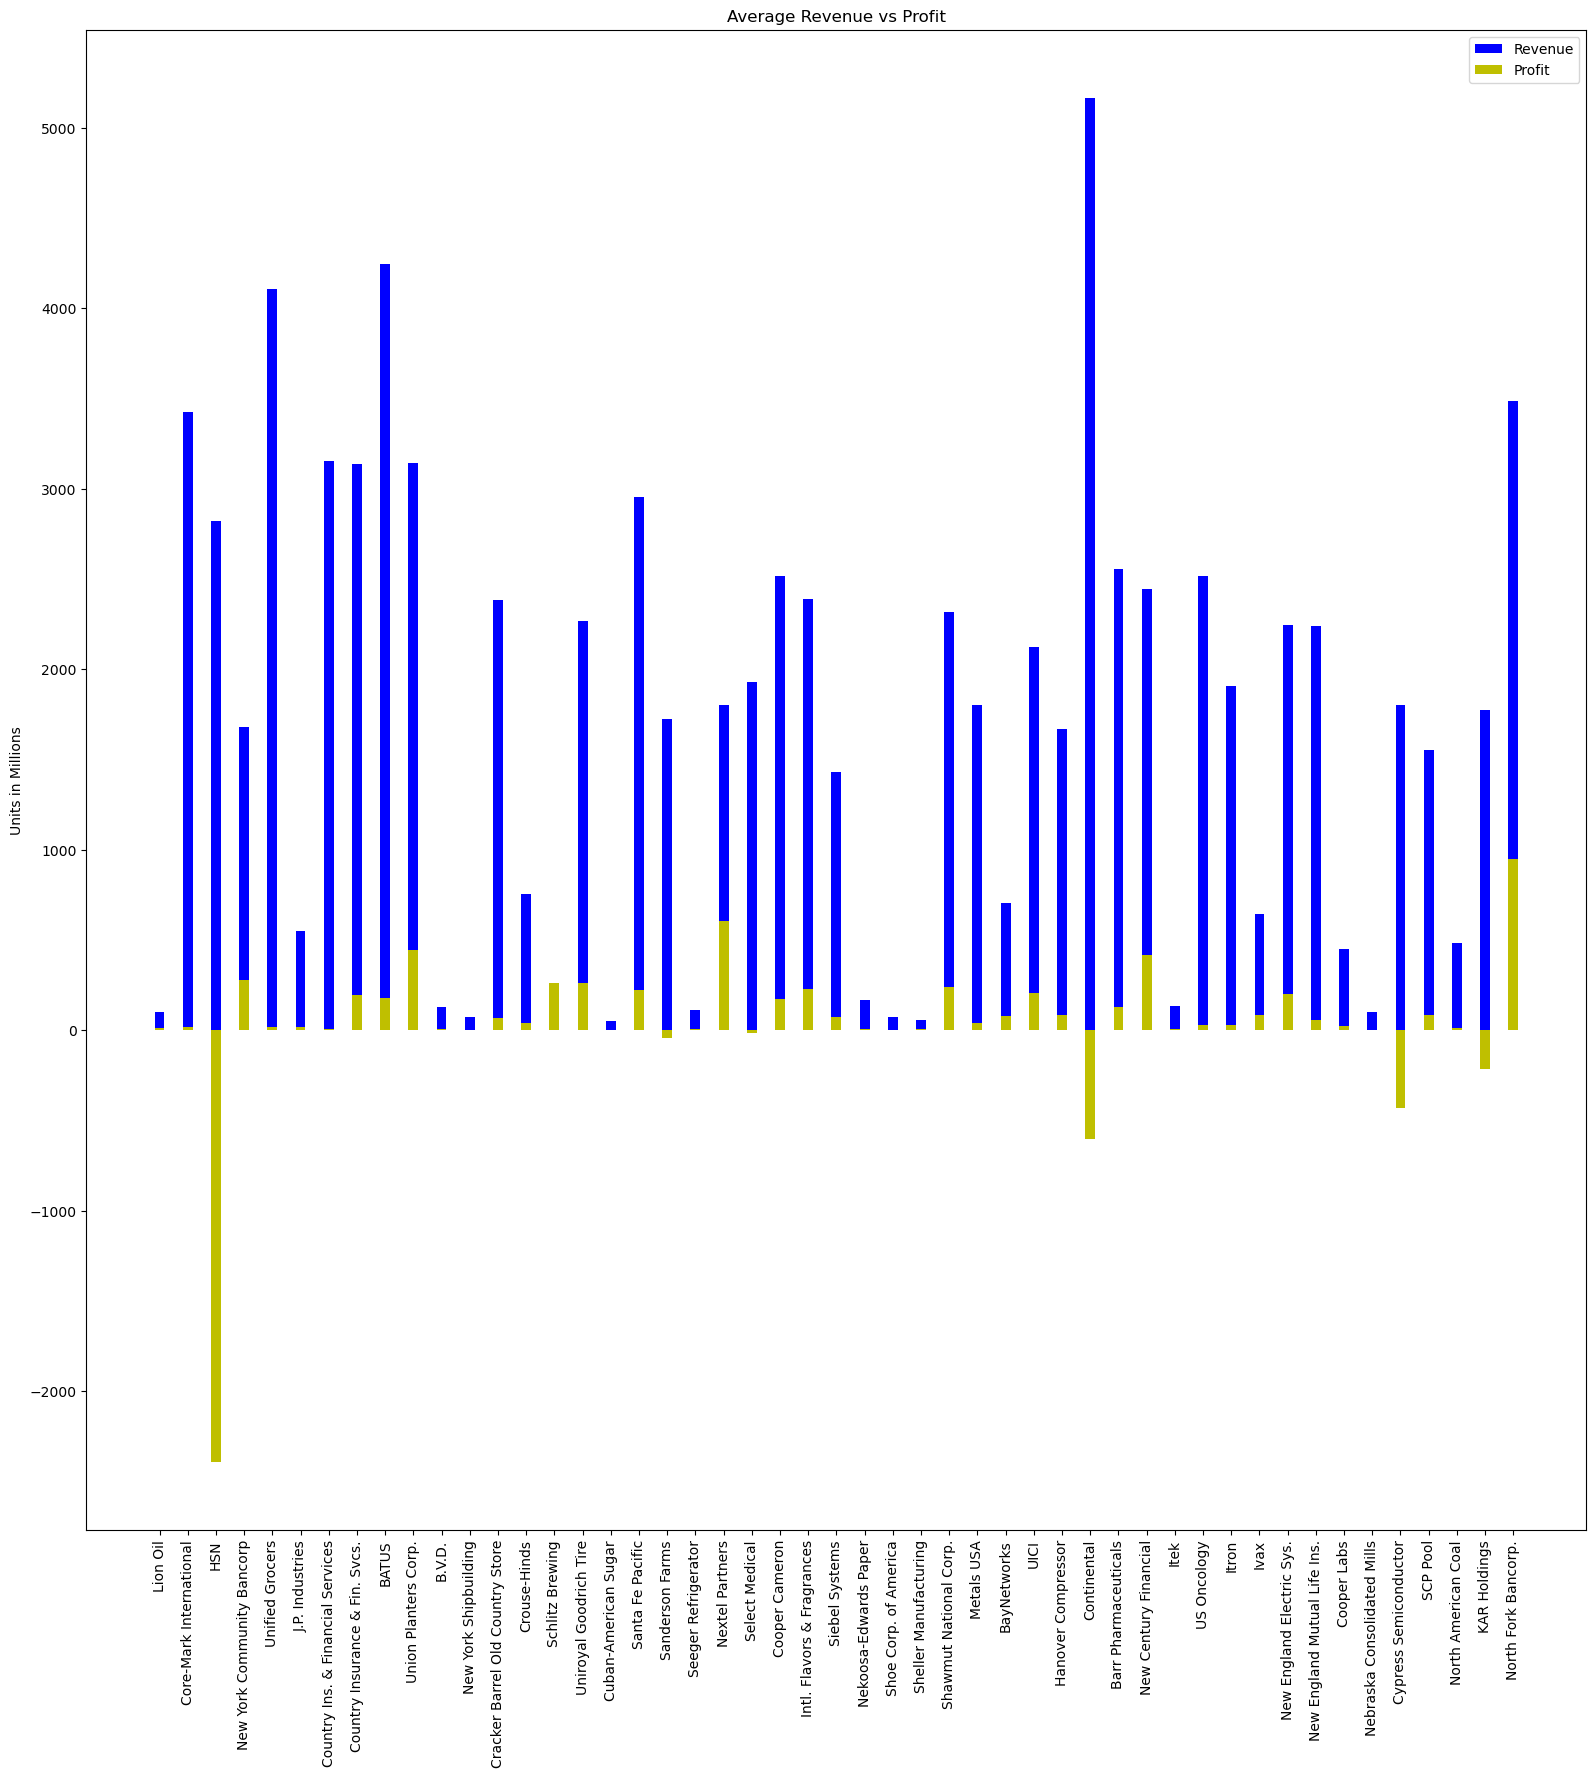

In [63]:
# Top New Company
fig=plt.figure(figsize=(15,15))

axes=fig.add_axes([0,0,1,1])   

axes.set_title('Average Revenue vs Profit')
axes.set_ylabel('Units in Millions')

axes.bar(Top_new_Company["Company"],Top_new_Company["Average_Revenue"],width=0.35,color='b')
axes.bar(Top_new_Company["Company"],Top_new_Company["Average_Profit"],width=0.35,color='y')

axes.legend(labels=['Revenue','Profit'])
axes.set_xticklabels(Top_new_Company["Company"], rotation=90)
plt.show()

## Distribution with respect to Revenue

(-500.0, 6000.0)

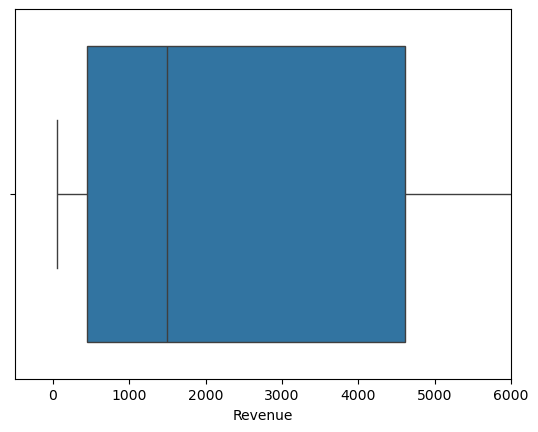

In [87]:
sns.boxplot(data=df, x="Revenue")
plt.xlim([-500,6000])

(-2000.0, 2000.0)

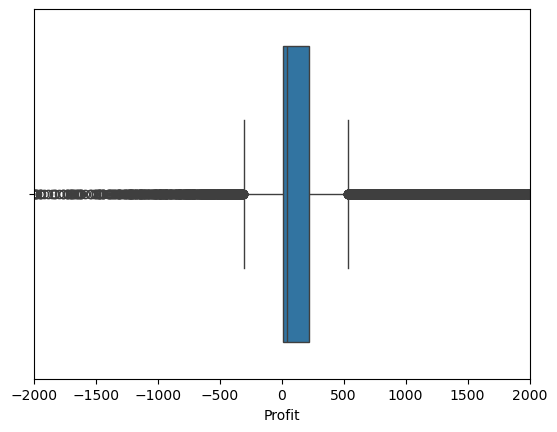

In [79]:
sns.boxplot(data=df, x="Profit")
plt.xlim([-2000,2000])

In [93]:
descriptive_stats = df['Revenue'].describe() 
print(descriptive_stats) 

count     29500.000000
mean       5237.162102
std       14335.344473
min          49.700000
25%         443.275000
50%        1498.050000
75%        4607.825000
max      442851.000000
Name: Revenue, dtype: float64
